In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import shapely.geometry
import pandas as pd
import datetime
import iris
import iris.coord_categorisation

iananmean = iris.analysis.Aggregator('nanmean', np.nanmean)

In [2]:
solar_all = iris.load_cube('UK_mean_timeseries_solar_1979_2016.nc')

daycoord = solar_all[::24].coord('time')
hourcoord = iris.coords.DimCoord(np.arange(24), long_name='hour_of_day', units='hours', circular=True)

/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'ssrd' contains unknown cell method 'nanmean'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


In [3]:
solar_reshape = iris.cube.Cube(solar_all.data.reshape([len(daycoord.points), len(hourcoord.points)]), 
                             long_name=solar_all.name(), units=solar_all.units, dim_coords_and_dims=[(daycoord, 0), (hourcoord, 1)])

In [4]:
iris.coord_categorisation.add_day_of_year(solar_reshape, 'time')
iris.coord_categorisation.add_year(solar_reshape, 'time')

In [5]:
print(solar_reshape)

surface_downwelling_shortwave_flux_in_air / (J m**-2) (time: 13870; hour_of_day: 24)
     Dimension coordinates:
          time                                             x                   -
          hour_of_day                                      -                   x
     Auxiliary coordinates:
          day_of_year                                      x                   -
          year                                             x                   -


In [6]:
solar_mean = solar_reshape.collapsed('hour_of_day', iananmean)

solar_normalised = solar_reshape/solar_mean

#solar_normalised has mean1

/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'hour_of_day'.
  warnings.warn(msg.format(self.name()))


In [7]:
solar_seasonal = solar_normalised.aggregated_by(['day_of_year'], iananmean)

unknown / (1)                       (-- : 366; hour_of_day: 24)
     Dimension coordinates:
          hour_of_day                   -                 x
     Auxiliary coordinates:
          day_of_year                   x                 -
          time                          x                 -
          year                          x                 -
     Cell methods:
          nanmean: day_of_year


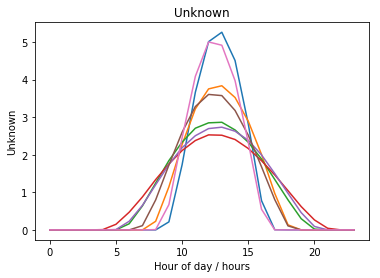

In [8]:
print(solar_seasonal)
import iris.quickplot as qplt
for i in np.arange(1, 360, 55):
    qplt.plot(solar_seasonal[i])
plt.show()

In [10]:
case_no = '1'
field = 'rsds'
obs = np.loadtxt('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_' + field + '.dat')
obs_date = np.load('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_date.npy')

In [11]:
# Case 1: 7 days

obs_days = np.reshape(np.array(obs), [7, 24])
obs_dates = np.reshape(obs_date, [7, 24])

monthoffset = [0, 1, -1, 0, 0, 1, 1, 2, 3, 3, 4, 4]
# (monthno-1)*30 + monthoffset + date = day

downscaled_days = np.zeros_like(obs_days)
for i in np.arange(7):
    
    Smean = np.mean(obs_days[i, :])
    # extract permitted information: daily mean
    
    month = int(str(obs_dates[i, 0])[5:7])
    date = int(str(obs_dates[i, 0])[8:10])
    day = (month-1)*30 + monthoffset[month-1] + date
    
    downscaled_days[i, :] = Smean * solar_seasonal.data[day, :]
    # solar_seasonal is the mean diurnal cycle over each day of the calendar year for 40 years, with mean 1

In [12]:
from eval_case_study_function2 import RMS_based_eval
#from eval_case_study_function import MAE_based_eval

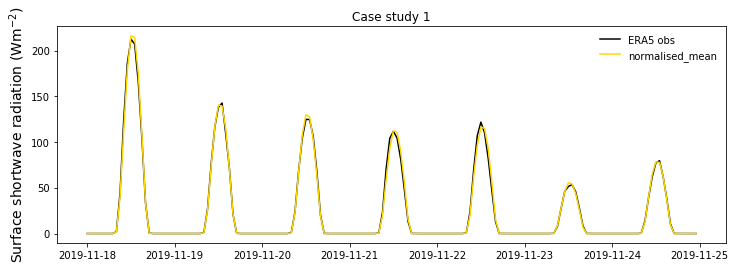

[4.017949993881519e-16, 2.949163568585536]

In [14]:
downscale_ts = np.reshape(downscaled_days, [168])
RMS_based_eval(downscale_ts,'rsds','1','normalised_mean')

In [17]:
case_no = '2'
field = 'rsds'
obs = np.loadtxt('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_' + field + '.dat')
obs_date = np.load('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_date.npy')

In [19]:
# Case 2: 9 days
nd = 9

obs_days = np.reshape(np.array(obs), [nd, 24])
obs_dates = np.reshape(obs_date, [nd, 24])

monthoffset = [0, 1, -1, 0, 0, 1, 1, 2, 3, 3, 4, 4]
# (monthno-1)*30 + monthoffset + date = day

downscaled_days2 = np.zeros_like(obs_days)
for i in np.arange(nd):
    
    Smean = np.mean(obs_days[i, :])
    # extract permitted information: daily mean
    
    month = int(str(obs_dates[i, 0])[5:7])
    date = int(str(obs_dates[i, 0])[8:10])
    day = (month-1)*30 + monthoffset[month-1] + date
    
    downscaled_days2[i, :] = Smean * solar_seasonal.data[day, :]
    # solar_seasonal is the mean diurnal cycle over each day of the calendar year for 40 years, with mean 1

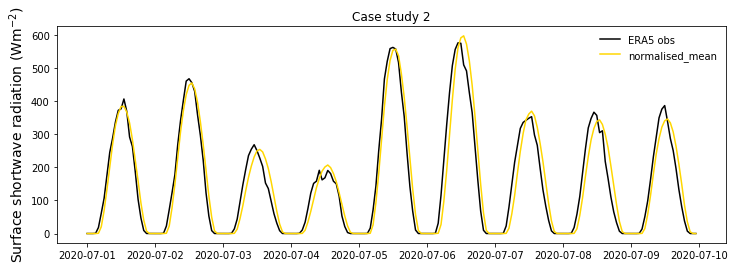

[1.578983857244667e-15, 46.09079133134908]

In [21]:
downscale_ts = np.reshape(downscaled_days2, [216])
RMS_based_eval(downscale_ts,'rsds','2','normalised_mean')
#print(MAE)
#print(RMS)

In [22]:
case_no = '3'
field = 'rsds'
obs = np.loadtxt('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_' + field + '.dat')
obs_date = np.load('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_date.npy')

In [23]:
# Case 3: 28 days
nd = 28

obs_days = np.reshape(np.array(obs), [nd, 24])
obs_dates = np.reshape(obs_date, [nd, 24])

monthoffset = [0, 1, -1, 0, 0, 1, 1, 2, 3, 3, 4, 4]
# (monthno-1)*30 + monthoffset + date = day

downscaled_days3 = np.zeros_like(obs_days)
for i in np.arange(nd):
    
    Smean = np.mean(obs_days[i, :])
    # extract permitted information: daily mean
    
    month = int(str(obs_dates[i, 0])[5:7])
    date = int(str(obs_dates[i, 0])[8:10])
    day = (month-1)*30 + monthoffset[month-1] + date
    
    downscaled_days3[i, :] = Smean * solar_seasonal.data[day, :]
    # solar_seasonal is the mean diurnal cycle over each day of the calendar year for 40 years, with mean 1

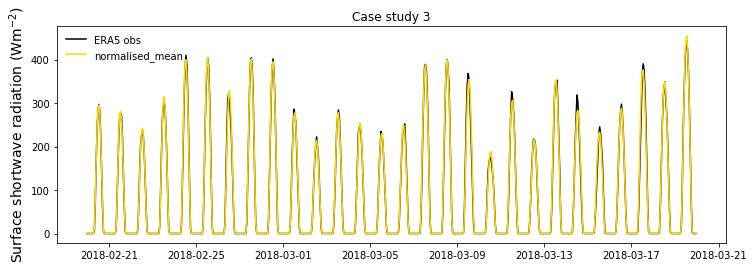

[1.0467817089322905e-15, 8.924389670677888]

In [24]:
downscale_ts = np.reshape(downscaled_days3, [672])
#MAE, RMS = 
RMS_based_eval(downscale_ts,'rsds','3','normalised_mean')
#print(MAE)
#print(RMS)